# Clustering algorithm 
## V Padmaja 19BAI1107

### Importing libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("Multiclass-dataset_ml.csv")
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,3.30,7.44,1.52,3.27,0.07,2.14,0.75,0.66,0.0,54.8,...,50.7,6.55,4.09,4.26,0.01,0.00,24.7,2.7,1.6,V1
1,3.43,7.63,1.63,3.27,0.05,2.01,0.74,0.65,0.0,51.8,...,47.9,8.35,5.08,5.01,0.01,0.00,23.3,2.3,1.8,V1
2,3.41,7.32,1.52,3.18,0.07,2.09,0.80,0.70,0.0,54.0,...,54.4,9.27,6.85,7.14,0.19,0.06,25.0,2.5,-0.9,V1
3,3.78,7.85,1.69,3.35,0.03,1.98,0.77,0.67,0.0,57.7,...,48.9,10.26,5.96,5.47,0.05,0.01,24.1,5.6,2.1,V1
4,3.90,7.99,1.61,3.43,0.02,2.14,0.77,0.71,0.0,59.1,...,54.1,8.19,5.81,4.72,0.64,0.16,26.8,2.5,2.1,V1


In [3]:
X = data.drop(['Target Label'],axis=1)

## K means

In [4]:
#min max scaler
scaler = MinMaxScaler()

for i in X.columns:
    scaler.fit(data[[i]])
    X[i] = scaler.transform(X[[i]])
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
0,0.385281,0.493617,0.330097,0.614679,0.454545,0.625850,0.40,0.166667,0.0,0.082202,0.050390,0.069636,0.033597,0.001104,0.041871,0.002681,0.000000,0.080214,0.119816,0.084746
1,0.441558,0.574468,0.436893,0.614679,0.272727,0.537415,0.35,0.083333,0.0,0.060758,0.033357,0.046964,0.104743,0.055770,0.082654,0.002681,0.000000,0.055258,0.101382,0.091525
2,0.432900,0.442553,0.330097,0.532110,0.454545,0.591837,0.65,0.500000,0.0,0.076483,0.056068,0.099595,0.141107,0.153506,0.198477,0.050938,0.060606,0.085561,0.110599,0.000000
3,0.593074,0.668085,0.495146,0.688073,0.090909,0.517007,0.50,0.250000,0.0,0.102931,0.032647,0.055061,0.180237,0.104362,0.107667,0.013405,0.010101,0.069519,0.253456,0.101695
4,0.645022,0.727660,0.417476,0.761468,0.000000,0.625850,0.50,0.583333,0.0,0.112938,0.081618,0.097166,0.098419,0.096080,0.066884,0.171582,0.161616,0.117647,0.110599,0.101695


In [5]:
sqerror = []
silscore = []
d = []
kvalues = [i for i in range(2,11)]
for k in kvalues:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sqerror.append(kmeans.inertia_)
    silscore.append(silhouette_score(X,kmeans.labels_))
    d.append([kmeans.inertia_,silhouette_score(X,kmeans.labels_)])

kmeans_results = pd.DataFrame(data=d)
print(kmeans_results)

            0         1
0  217.851786  0.471396
1  149.085943  0.433713
2  118.664639  0.352516
3  110.445384  0.300789
4  104.885012  0.283661
5   99.521961  0.257438
6   94.474707  0.265478
7   89.260096  0.180268
8   85.882331  0.173998


## Plotting errors:

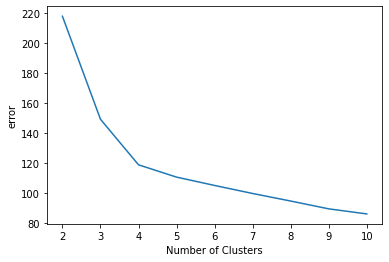

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), sqerror)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("error")
plt.show()

## Plotting silhouette score:

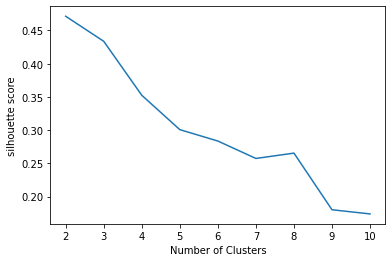

In [7]:
plt.plot(range(2, 11), silscore)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.show()

### Optimum value considered is 4, since it is at kneebreak point in the first plot and also has a comparatiely high silhouette score

In [8]:
kmeans = KMeans(n_clusters=4,random_state=101)
kmeans.fit_predict(X)
print("clusters centers are: \n",kmeans.cluster_centers_)
print("\n\ncluster indexes of each points are: \n",kmeans.labels_)
print("\n\nsquared error is: ",kmeans.inertia_)
print("\nsilhouette score is: ",silhouette_score(X,kmeans.labels_))

clusters centers are: 
 [[0.58630952 0.60005319 0.49805825 0.55745413 0.32727273 0.46879252
  0.646875   0.45208333 0.00145833 0.94228914 0.88818311 0.80409919
  0.25322134 0.56205826 0.5728317  0.01370643 0.01363636 0.91586453
  0.15645161 0.41983051]
 [0.42049062 0.44865248 0.38614887 0.45345566 0.35212121 0.51097506
  0.59666667 0.44166667 0.03277778 0.35733143 0.12651999 0.07404588
  0.4018498  0.32273882 0.20204459 0.02711349 0.02801347 0.23503268
  0.66976959 0.46662147]
 [0.43047357 0.44951644 0.39776405 0.45051432 0.29614325 0.50030921
  0.61742424 0.43434343 0.         0.47476553 0.20461535 0.10991289
  0.39272967 0.37079799 0.18922504 0.71927045 0.80241812 0.33111867
  0.73209049 0.60570108]
 [0.38690476 0.44439444 0.35950336 0.47812279 0.33041958 0.54860021
  0.51346154 0.35657051 0.08301282 0.12406527 0.06142518 0.07835565
  0.1874886  0.16660472 0.17468733 0.03882244 0.04351204 0.10302688
  0.21601382 0.11900261]]


cluster indexes of each points are: 
 [3 3 3 3 3 3 3 3 3 

## Fine tuning to improve result

In [9]:

adj_data = []

kmeans1 = KMeans(init="random",n_clusters=4,random_state=101)
kmeans1.fit_predict(X)
adj_data.append(["random initialization",kmeans1.inertia_,silhouette_score(X,kmeans1.labels_)])

kmeans2 = KMeans(n_clusters=4,n_init=2000,random_state=101) #n_Init changed from 10 to 2000
kmeans2.fit_predict(X)
adj_data.append(["n_init=2000",kmeans2.inertia_,silhouette_score(X,kmeans2.labels_)])

kmeans3 = KMeans(n_clusters=4,max_iter=500,random_state=101) #max_iter changed from 300 to 500
kmeans3.fit_predict(X)
adj_data.append(["max_iter=500",kmeans3.inertia_,silhouette_score(X,kmeans3.labels_)])

adj_df = pd.DataFrame(data = adj_data,columns=["fine-tuning","error","silhouette score"])
print(adj_df)

             fine-tuning       error  silhouette score
0  random initialization  118.664639          0.352516
1            n_init=2000  118.664639          0.352516
2           max_iter=500  118.664639          0.352516


### In k means we dont get far better results even after fine tuning.

## K medoid

In [10]:
sqerror = []
silscore = []
d = []
kvalues = [i for i in range(2,11)]
for k in kvalues:
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(X)
    sqerror.append(kmedoids.inertia_)
    silscore.append(silhouette_score(X,kmedoids.labels_))
    d.append([kmedoids.inertia_,silhouette_score(X,kmedoids.labels_)])

kmedoids_results = pd.DataFrame(data=d)
print(kmedoids_results)

            0         1
0  355.261892  0.207318
1  268.031150  0.286623
2  257.220819  0.235088
3  213.270578  0.295810
4  213.431986  0.258717
5  206.868408  0.251716
6  206.546197  0.248396
7  204.672701  0.226538
8  196.451543  0.222881


## Plotting errors:

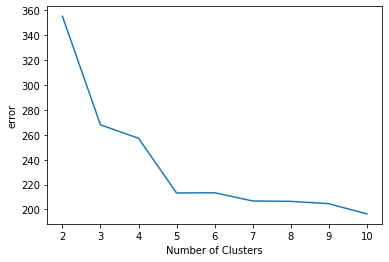

In [11]:
plt.plot(range(2, 11), sqerror)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("error")
plt.show()

## Plotting silhouette score:

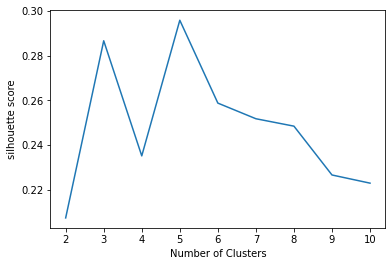

In [12]:
plt.plot(range(2, 11), silscore)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.show()

### 3 is considered a good choice as first maximum knee behaviour occurs there.

In [13]:
kmedoids = KMedoids(n_clusters=3,random_state=101)
kmedoids.fit_predict(X)
print("clusters centers are: \n",kmedoids.cluster_centers_)
print("\n\ncluster indexes of each points are: \n",kmedoids.labels_)
print("\n\nsquared error is: ",kmedoids.inertia_)
print("\nsilhouette score is: ",silhouette_score(X,kmedoids.labels_))

clusters centers are: 
 [[0.35930736 0.37021277 0.36893204 0.42201835 0.45454545 0.51020408
  0.65       0.33333333 0.         0.11293781 0.04045422 0.05991903
  0.19090909 0.13528437 0.15715063 0.         0.         0.0802139
  0.25345622 0.11525424]
 [0.66233766 0.6893617  0.49514563 0.68807339 0.36363636 0.5170068
  0.6        0.5        0.         0.92423159 0.88218595 0.82510121
  0.27233202 0.57923799 0.54594889 0.01608579 0.02020202 0.90909091
  0.14746544 0.3559322 ]
 [0.54112554 0.56595745 0.41747573 0.6146789  0.27272727 0.55102041
  0.6        0.5        0.         0.32451751 0.11213627 0.07692308
  0.38853755 0.23854224 0.17944535 0.         0.         0.21390374
  0.63133641 0.40677966]]


cluster indexes of each points are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 2 

## Fine tuning to improve result

In [14]:

adj_data = []

kmedoids1 = KMedoids(init="random",n_clusters=3,random_state=101)
kmedoids1.fit_predict(X)
adj_data.append(["random initialization",kmedoids1.inertia_,silhouette_score(X,kmedoids1.labels_)])

kmedoids2 = KMedoids(init="heuristic",n_clusters=3,random_state=101)
kmedoids2.fit_predict(X)
adj_data.append(["heuristic initialization",kmedoids2.inertia_,silhouette_score(X,kmedoids2.labels_)])

kmedoids3 = KMedoids(init="k-medoids++",n_clusters=3,random_state=101)
kmedoids3.fit_predict(X)
adj_data.append(["k-mediods++ initialization",kmedoids3.inertia_,silhouette_score(X,kmedoids3.labels_)])

kmedoids4 = KMedoids(n_clusters=3,metric="manhattan",random_state=101)
kmedoids4.fit_predict(X)
adj_data.append(["Manhattan distance",kmedoids4.inertia_,silhouette_score(X,kmedoids4.labels_)])

kmedoids5 = KMedoids(n_clusters=3,metric="cosine",random_state=101)
kmedoids5.fit_predict(X)
adj_data.append(["cosine distance",kmedoids5.inertia_,silhouette_score(X,kmedoids5.labels_)])

kmedoids6 = KMedoids(n_clusters=3,metric="cosine",random_state=101)
kmedoids6.fit_predict(X)
adj_data.append(["max_iter=500",kmedoids6.inertia_,silhouette_score(X,kmedoids6.labels_)])

adj_df = pd.DataFrame(data = adj_data,columns=["fine-tuning","error","silhouette score"])
print(adj_df)

                  fine-tuning        error  silhouette score
0       random initialization   338.129153          0.095329
1    heuristic initialization   268.031150          0.286623
2  k-mediods++ initialization   247.862704          0.437009
3          Manhattan distance  1086.449529          0.056381
4             cosine distance    24.680752          0.428699
5                max_iter=500    24.680752          0.428699


### in k medoids incresing maximum iterations and including cosine metrics seems to result in better performance.